In [74]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)

In [75]:
pd.DataFrame.head(df)

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df['win'] = df['winner'] == player
df['win'].tail()

1174    False
1175     True
1176     True
1177     True
1178    False
Name: win, dtype: bool

In [77]:
df.dtypes

year                                       int64
tournament                                object
start date                                object
type                                      object
surface                                   object
draw                                      object
atp points                                object
atp ranking                              float64
tournament prize money                    object
round                                     object
opponent                                  object
ranking                                   object
score                                     object
stats link                                object
tournament.1                              object
tournament round                          object
time                                       int64
winner                                    object
player1 name                              object
player1 nationality                       object
player1 aces        

In [78]:
print("{player} has won {vic:.0f}% of his ATP matches.".format(player=player, vic=100*df['win'].mean()))

Roger Federer has won 82% of his ATP matches.


In [79]:
date = pd.to_datetime(df['start date'])
df['dblfaults'] = (df['player1 double faults']/df['player1 total points total'])
df['dblfaults'].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: dblfaults, dtype: float64

In [80]:
df['player1 double faults'].mean()

1.9727361246348589

In [81]:
df.groupby('surface')['win'].mean()

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

In [82]:
gb = df.groupby('year')

In [89]:
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

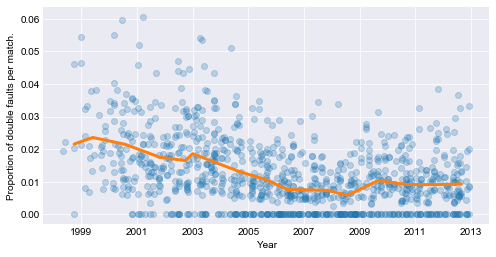

In [90]:
plt.figure(figsize=(8,4))
plt.plot_date(date.astype(datetime), df['dblfaults'], alpha=.25, lw=0)
plt.plot_date(gb['start date'].max(), gb['dblfaults'].mean(), '-', lw=3)
plt.xlabel('Year')
plt.ylabel('Proportion of double faults per match.')